# Spatial Visualization with ArcGIS API for Python

## arcgis.mapping module

The arcgis.mapping module contains classes and functions to represent and interact with web maps, scenes, and certain layer types such as map image and vector tiles. In this page we will observe how to visualize maps, scenes and layers using the map widget in Jupyter notebook environment.

- Setting the map properties
    + Zoom level
    + Map center
    + Basemaps
    + 3D Mode
- Adding layers to the map
- Adding Item objects to the map
- Adding layer objects to the map
- Adding Imagery layers
- Listing and removing layers from the map
- Graphic support
- Saving the map as a web map

## Creating a Map

In [1]:
from arcgis.gis import GIS
gis = GIS()
m = gis.map('Frankfurt, DE')
m

MapView(layout=Layout(height='400px', width='100%'))

## WebMap Properties

  + Zoom level
  + Map center
  + Basemaps
  + 3D Mode
  + rotation

### Zoom Level

In [5]:
m.zoom

10.0

In [4]:
m.zoom = 15

### Rotation

- values are 0-360 degrees

In [6]:
import time
for r in [45, 90, 180, 270, 0]:
    m.rotation = r
    time.sleep(3)

### Basemaps

- provide the underlying background for the web map
- `basemaps` provides a list available basemap 
- `basemap` - get/set the background

In [7]:
m1 = gis.map('Paris') # RUN ME :) 
m1

MapView(layout=Layout(height='400px', width='100%'))

In [8]:
for bm in m1.basemaps[::2]:
    print(m1.basemap)
    m1.basemap = bm
    time.sleep(1.5)

default
dark-gray
gray
hybrid
oceans
satellite
streets-navigation-vector
streets-relief-vector
terrain


### 3D Mode

- The map widget supports both 2D and 3D

In [9]:
m2 = gis.map('Zurich', mode='3D')
m2.zoom = 8
m2

MapView(layout=Layout(height='400px', width='100%'), mode='3D', zoom=8.0)

## Adding Content to the Map Widget

In [10]:
flayer_search_result = gis.content.search("europe owner:esri_dm","Feature Layer")
flayer_search_result

[<Item title:"Europe NUTS 1 Demographics" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Europe NUTS 1 Areas" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Europe NUTS 2 Areas" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Europe NUTS 3 Areas" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Europe NUTS 2 Demographics" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Europe NUTS 3 Demographics" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"World Continents" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Europe NUTS 0 Areas" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Europe NUTS 0 Demographics" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"Europe_Countries_2017" type:Feature Layer Collection owner:esri_dm>]

#### Adding by Item

- Data can be displayed on the webmap using Item
- This supports: Feature Layer, Imagery Services and other.

In [11]:
m3 = gis.map('Netherlands')
m3.zoom = 7
m3

MapView(layout=Layout(height='400px', width='100%'), zoom=7.0)

In [12]:
m3.add_layer(flayer_search_result[0])

In [13]:
img_items = gis.content.get("e7e530e0067d47c7b3478d44518b563e")
img_items

<Item title:"AHN3 50cm maaiveld - Hillshade" type:Imagery Layer owner:Esri_NL_Content>

In [14]:
m3.add_layer(img_items)

In [15]:
m3.remove_layers()

True

#### Adding by Layer

In [16]:
m4 = gis.map("Netherlandas")
m4.zoom = 7
m4

MapView(layout=Layout(height='400px', width='100%'), zoom=7.0)

In [17]:
img_items.layers

[<ImageryLayer url:"https://ahn.arcgisonline.nl/arcgis/rest/services/Hoogtebestand/AHN3_i/ImageServer">]

In [18]:
m4.add_layer(img_items.layers[0])

#### Adding a Spatially enabled DataFrame

In [19]:
item = gis.content.get("6996f03a1b364dbab4008d99380370ed")
sdf = item.layers[0].query(as_df=True)

In [20]:
sdf.head()

,ADMIN_NAME,CITY_NAME,CNTRY_NAME,FID,FIPS_CNTRY,GMI_ADMIN,LABEL_FLAG,ObjectID,POP,POP_CLASS,POP_RANK,PORT_ID,SHAPE,STATUS
0,Mato Grosso,Cuiaba,Brazil,1,BR,BRA-MGR,0,0,521934,"500,000 to 999,999",3,0,"{'x': -6244244.606196579, 'y': -1760180.180467...",Provincial capital
1,Kentucky,Frankfort,United States,2,US,USA-KEN,0,500,16315,"Less than 50,000",7,0,"{'x': -9444234.68158556, 'y': 4607859.98773734...",Provincial capital
2,Tennessee,Nashville,United States,3,US,USA-TNN,0,501,530852,"500,000 to 999,999",3,0,"{'x': -9664535.074973334, 'y': 4320178.2505069...",Provincial capital
3,Distrito Federal,Brasilia,Brazil,4,BR,BRA-DFD,0,1,2207718,"1,000,000 to 4,999,999",2,0,"{'x': -5331952.879361972, 'y': -1780660.510942...",National and provincial capital
4,Goias,Goiania,Brazil,5,BR,BRA-GOI,0,2,1171195,"1,000,000 to 4,999,999",2,0,"{'x': -5483041.697485694, 'y': -1889069.697082...",Provincial capital


In [21]:
sdf.spatial.plot(map_widget=m4)

True

## Cartography using the ArcGIS API from Python

### Smart Mapping

- process of creating maps with ease
- uses algorithms to auto generate the best cartography

In [22]:
freeway_item = gis.content.get('91c6a5f6410b4991ab0db1d7c26daacb')
freeway_item

<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri_dm>

In [23]:
m5 = gis.map("Los Angles, CA")
m5

MapView(layout=Layout(height='400px', width='100%'))

In [24]:
m5.center = [34, -118]
#m5.zoom = 11
m5.add_layer(freeway_item, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})

#### Visualize by Field


In [25]:
m6 = gis.map('Washington State')
m6

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
m6.add_layer({"type":"FeatureLayer", 
               "url":"http://sampleserver6.arcgisonline.com/arcgis/rest/services/Census/MapServer/2",
               "definition_expression" : "STATE_NAME='Washington'",
               "renderer":"ClassedColorRenderer",
               "field_name":"POP2007",
               "opacity":0.7})

In [27]:
m6.legend = True

### Advanced Cartography

#### Compare A to B

- Renderers can compare two values

In [28]:
from arcgis.features import FeatureLayer

map4 = gis.map("France", 2)

map4_renderer = {"renderer": "autocast", #This tells python to use JS autocasting
                 "type": "classBreaks",  
                 "field":"POP2025",
                 "transparency":80,
                 "minValue":-9007199254740991}

map4_renderer["visualVariables"] = [{   "type": "colorInfo",
                                        "field": "POP2025",
                                        "normalizationField": "POP2015",
                                        "stops": [
                                            {   "value": 1.12,
                                                "color": [230,97,1,255],
                                                "label": "< 112%"
                                            },
                                            {   "value": 1.1800000000000002,
                                                "color": [253,184,99,255],
                                                "label": "112% ~ 124%"
                                            },
                                            {   "value": 1.24,
                                                "color": [247,247,247,255],
                                                "label": "124%"
                                            },
                                            {   "value": 1.3,
                                                "color": [178,171,210,255],
                                                "label": "124% ~ 136%"
                                            },
                                            {   "value": 1.36,
                                                "color": [94,60,153,255],
                                                "label": "> 136%"
                                            }]
                                    }]

map4_renderer["classBreakInfos"] = [{   "symbol": {
                                            "color": [170,170,170,255],
                                            "size": 10.5,
                                            "angle": 0,
                                            "xoffset": 0,
                                            "yoffset": 0,
                                            "type": "esriSMS",
                                            "style": "esriSMSCircle",
                                            "outline": {
                                                "color": [153,153,153,255],
                                                "width": 0.375,
                                                "type": "esriSLS",
                                                "style": "esriSLSSolid"
                                            }
                                        },
                                        "classMaxValue": 9007199254740991
                                    }]

world_flayer = FeatureLayer("http://services.arcgis.com/nGt4QxSblgDfeJn9/arcgis/rest/services/World_LargestUrbanAreas_fs/FeatureServer/0")

map4.add_layer(world_flayer,
               { "type": "FeatureLayer",
                 "renderer": map4_renderer,
                 "field_name":"POP2025",
                 "normalizationType": "esriNormalizeByField",
                 "normalizationField": "POP2015"})

map4

MapView(layout=Layout(height='400px', width='100%'), zoom=2.0)

In [29]:
map4.legend = True

#### Render on Numeric Attribute


In [30]:
from arcgis.features import FeatureLayer
usa_flayer = FeatureLayer("https://services.arcgis.com/V6ZHFr6zdgNZuVG0/arcgis/rest/services/USA_County_Crops_2007/FeatureServer/0")
map1 = gis.map()
map1.center = [38.32016202887768, -94.49274418999963]
map1.zoom = 4
map1.add_layer(usa_flayer, { "type": "FeatureLayer",
                             "renderer":"ClassedColorRenderer",
                             "field_name":"M086_07"})
map1

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

### Rendering Spatially enabled DataFrame

The Spatially Enabled Dataframe has a plot() method that uses a syntax and symbology similar to matplotlib for visualizing features on a map. With this functionality, you can easily visualize aspects of your data both on a map and on a matplotlib chart using the same symbology!

Some unique characteristics of working with the visualization capabalities on the SDF:

    - Uses Pythonic syntax
    - Uses the same syntax as visualizing charts on Pandas DataFrames
    - Uses symbology familiar to users of matplotlib
    - Works on features and attributes simultaneously, eliminating to a great extent the need to iterate over all features (rows)
    - Handles reading and writing to multiple formats aiding data conversion
    

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-1wig{font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-fymr{font-weight:bold;border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-fymr">Renderer</th>
    <th class="tg-1wig">Syntax</th>
    <th class="tg-1wig">Explanition</th>
  </tr>
  <tr>
    <td class="tg-0pky">Simple</td>
    <td class="tg-0lax">'s'</td>
    <td class="tg-0lax">renders using one symbol only</td>
  </tr>
  <tr>
    <td class="tg-0pky">Unique</td>
    <td class="tg-0lax">'u'</td>
    <td class="tg-0lax">renders each unique value with different symbol</td>
  </tr>
  <tr>
    <td class="tg-0lax">Unique</td>
    <td class="tg-0lax">'u-a'</td>
    <td class="tg-0lax">renders each unique value with a different symbol using an arcade expression</td>
  </tr>
  <tr>
    <td class="tg-0lax">Class Breaks</td>
    <td class="tg-0lax">'c'</td>
    <td class="tg-0lax">renders each group of values with a different color or size</td>
  </tr>
  <tr>
    <td class="tg-0lax">Heatmap</td>
    <td class="tg-0lax">'h'</td>
    <td class="tg-0lax">renders density of point data as a raster </td>
  </tr>
</table>

#### Obtain Test Data

In [31]:
from arcgis.gis import GIS
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
flayer = item.layers[0]
sdf = flayer.query(where="AGE_45_54 < 1500", as_df=True)
sdf.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,"{'x': -12462673.723706165, 'y': 5384674.994080..."
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,"{'x': -12506251.313993266, 'y': 5341537.793529..."
2,4,Burley,city,ID,16,1611260,,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,"{'x': -12667411.402393516, 'y': 5241722.820606..."
3,6,Chubbuck,city,ID,16,1614680,,6,14655,13922,...,1281,172,370,3586,3.40,4961,229,3324,1408,"{'x': -12520053.904151963, 'y': 5300220.333409..."
4,12,Jerome,city,ID,16,1641320,,6,11403,10890,...,779,210,385,2640,3.44,3985,292,2219,1474,"{'x': -12747828.64784961, 'y': 5269214.8197742..."


#### Unique Renderer

In [32]:
gis = GIS()
map4a = gis.map('Reno, NV', zoomlevel=4)
map4a.center = [38.365564106215935, -94.14943750000482]
map4a

MapView(layout=Layout(height='400px', width='100%'), zoom=4.0)

In [33]:
sdf.spatial.plot(map_widget=map4a,
                renderer_type='u',
                col='ST')

True

#### Simple Renderer

In [34]:
sdf.spatial.plot(symbol_type='simple',
                 symbol_style='d', # d - for diamonds
                 colors='Reds_r',
                 cstep=10,
                 outline_color='Blues',
                 marker_size=10)

MapView(layout=Layout(height='400px', width='100%'))

#### Classbreak Renderer

In [35]:
sdf.spatial.plot(renderer_type='c',  # for class breaks renderer
                 class_count=20,  
                 col='POPULATION',
                 cmap='prism',
                 alpha=0.7)

MapView(layout=Layout(height='400px', width='100%'))

#### Understanding Colormaps

- The display_colormaps function provides a quick, easy way to visualize the pre-defined set of colormaps you can use.

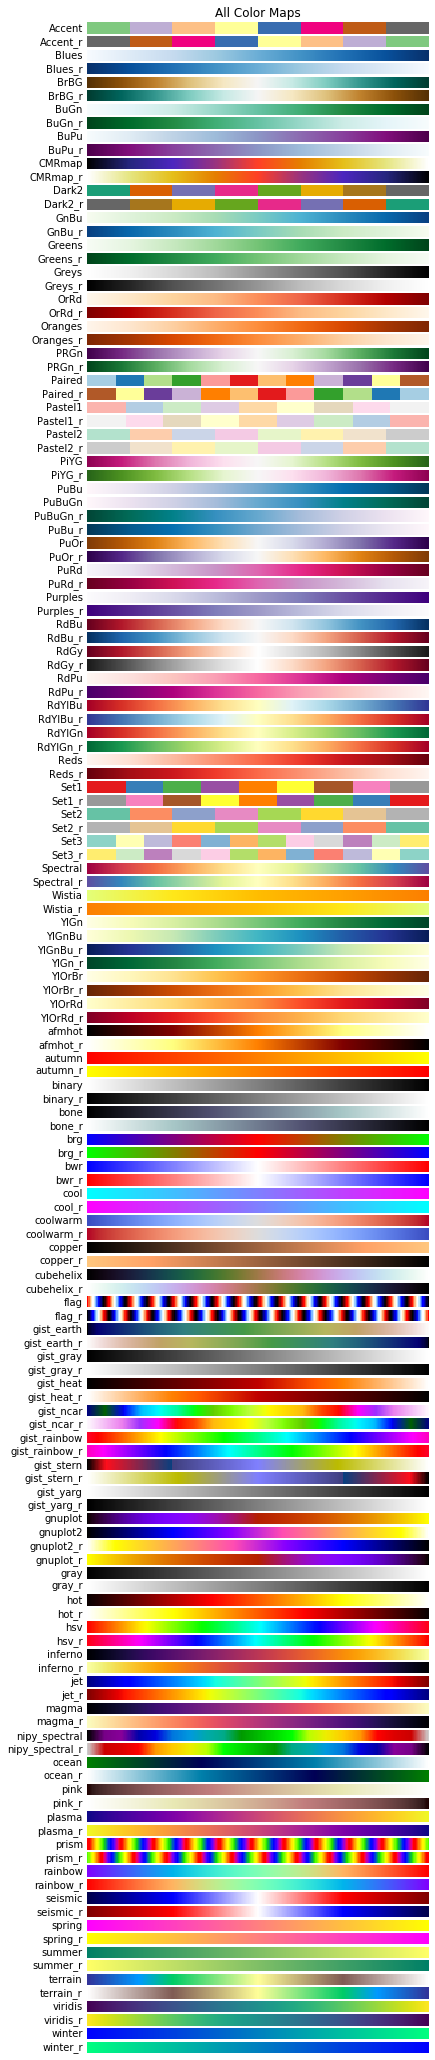

In [36]:
from arcgis.mapping import display_colormaps
display_colormaps()

In [37]:
from arcgis.mapping import symbol

colormaps = symbol.ALLOWED_CMAPS
for a,b,c,d,e in zip(colormaps[::5], colormaps[1::5], colormaps[2::5], colormaps[3::5], colormaps[4::5]):
    print("{:<20}{:<20}{:<20}{:<20}{:<}".format(a,b,c,d,e))

Accent              Accent_r            Blues               Blues_r             BrBG
BrBG_r              BuGn                BuGn_r              BuPu                BuPu_r
CMRmap              CMRmap_r            Dark2               Dark2_r             GnBu
GnBu_r              Greens              Greens_r            Greys               Greys_r
OrRd                OrRd_r              Oranges             Oranges_r           PRGn
PRGn_r              Paired              Paired_r            Pastel1             Pastel1_r
Pastel2             Pastel2_r           PiYG                PiYG_r              PuBu
PuBuGn              PuBuGn_r            PuBu_r              PuOr                PuOr_r
PuRd                PuRd_r              Purples             Purples_r           RdBu
RdBu_r              RdGy                RdGy_r              RdPu                RdPu_r
RdYlBu              RdYlBu_r            RdYlGn              RdYlGn_r            Reds
Reds_r              Set1                Set1_r     

In [38]:
from arcgis.mapping import symbol
symbol.create_symbol?